In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

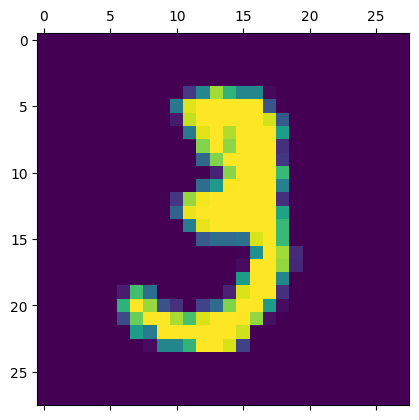

In [7]:
plt.matshow(X_train[10])

In [8]:
y_train[10]

3

In [4]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

X_train_flatten.shape

(60000, 784)

In [11]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=[784,], activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4680 - accuracy: 0.8799
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9158
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9246
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9267
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2556 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2532 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [13]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2659 - accuracy: 0.9277


[0.2659406363964081, 0.9276999831199646]

In [14]:
y_pred = model.predict(X_test_flatten)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([4.4389796e-03, 1.3585904e-08, 1.2359535e-02, 9.4889760e-01,
       1.6860779e-03, 1.0141311e-01, 3.2359171e-08, 9.9978000e-01,
       9.1326259e-02, 6.1620229e-01], dtype=float32)

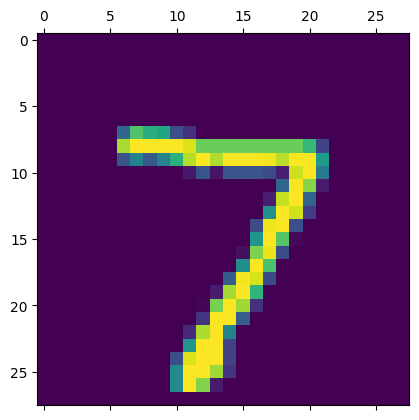

In [15]:
plt.matshow(X_test[0])

In [16]:
np.argmax(y_pred[0])

7

In [17]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [18]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   9,   10,  929,   12,    9,    2,   12,    8,   38,    3],
       [   5,    0,   19,  917,    1,   22,    2,    9,   27,    8],
       [   1,    1,    5,    2,  924,    0,    8,    3,    8,   30],
       [  11,    4,    1,   34,   12,  767,   16,    7,   34,    6],
       [  14,    3,    8,    1,    7,   10,  912,    1,    2,    0],
       [   2,    6,   25,    6,    9,    1,    0,  939,    2,   38],
       [   8,   13,    6,   16,    9,   18,    9,    7,  878,   10],
       [  11,    7,    1,    8,   30,    4,    0,   12,    8,  928]])>

Text(70.72222222222221, 0.5, 'Truth')

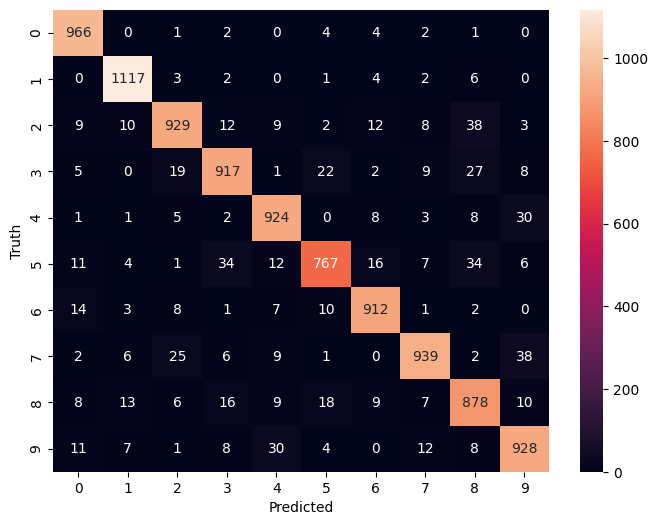

In [20]:
import seaborn as sn
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=[784,], activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train,validation_data=(X_test_flatten,y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.9240 - val_loss: 0.1378 - val_accuracy: 0.9601
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1206 - accuracy: 0.9649 - val_loss: 0.1142 - val_accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9751 - val_loss: 0.0888 - val_accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0834 - val_accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0820 - val_accuracy: 0.9749


In [22]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9749


[0.08196011930704117, 0.9749000072479248]

313/313 [==============================] - 0s 1ms/step


Text(70.72222222222221, 0.5, 'Truth')

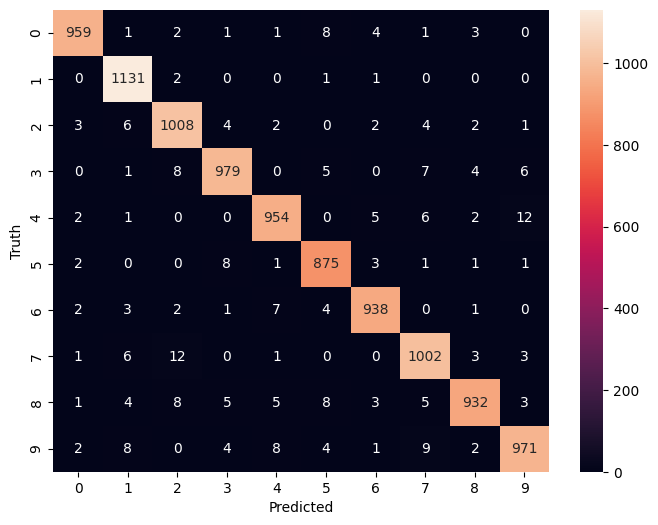

In [23]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ANN

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.9216 - val_loss: 0.1541 - val_accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1247 - accuracy: 0.9631 - val_loss: 0.1085 - val_accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9743 - val_loss: 0.0934 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0657 - accuracy: 0.9802 - val_loss: 0.0852 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.0885 - val_accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0783 - val_accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0738 - val_accuracy:

CNN

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1337 - accuracy: 0.9590 - val_loss: 0.0525 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0333 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0447 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0251 - val_accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0228 - val_accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.0276 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0366 -

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9925


[0.03250769525766373, 0.9925000071525574]